In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV

In [2]:
df = pd.read_csv('/content/Set4_PowerConsumption.csv',parse_dates=['DateTime'])
df_all_model = df
df_all_model

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [3]:
# Set the index to the datetime column
df.set_index('DateTime', inplace=True)
df

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


In [4]:
# Resample the data to daily frequency
df_daily = df.resample('D').mean()
df_monthly = df.resample('M').mean()

In [5]:
df_daily

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067,17737.791287,17868.795181
2017-01-02,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671,19557.725431,17820.763053
2017-01-03,12.100000,74.981667,0.076715,120.686014,28.574660,30562.447257,20057.269504,17620.803213
2017-01-04,10.509479,75.459792,0.082417,122.959319,28.827222,30689.831224,20102.077001,17673.694779
2017-01-05,10.866444,71.040486,0.083896,118.749861,29.741437,30802.911393,20033.941237,17664.176707
...,...,...,...,...,...,...,...,...
2017-12-26,11.621840,69.070903,0.083062,106.836687,50.760389,30013.476975,24757.006239,11395.678272
2017-12-27,15.232917,59.445903,0.082028,95.890674,41.705062,29966.962399,25057.481845,11498.279312
2017-12-28,13.662361,62.839375,0.081354,112.620160,30.209361,30267.004647,24585.251099,11167.026811


In [6]:
# Set the index to the datetime column
df.reset_index('DateTime', inplace=True)
df_daily.reset_index('DateTime', inplace=True)
df_daily['Month'] = df_daily['DateTime'].dt.month

In [7]:
# ใช้ apply และ strftime เพื่อสร้าง column ใหม่
df_daily["day"] = df_daily["DateTime"].apply(lambda x: x.strftime("%A"))

In [8]:
# Move the 'day' column to the front of the 'Temperature' column
day_col = df_daily.pop('day')
df_daily.insert(df_daily.columns.get_loc('Temperature'), 'day', day_col)

In [9]:
df_daily

,DateTime,day,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Month
0,2017-01-01,Sunday,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067,17737.791287,17868.795181,1
1,2017-01-02,Monday,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671,19557.725431,17820.763053,1
2,2017-01-03,Tuesday,12.100000,74.981667,0.076715,120.686014,28.574660,30562.447257,20057.269504,17620.803213,1
3,2017-01-04,Wednesday,10.509479,75.459792,0.082417,122.959319,28.827222,30689.831224,20102.077001,17673.694779,1
4,2017-01-05,Thursday,10.866444,71.040486,0.083896,118.749861,29.741437,30802.911393,20033.941237,17664.176707,1
...,...,...,...,...,...,...,...,...,...,...,...
359,2017-12-26,Tuesday,11.621840,69.070903,0.083062,106.836687,50.760389,30013.476975,24757.006239,11395.678272,12
360,2017-12-27,Wednesday,15.232917,59.445903,0.082028,95.890674,41.705062,29966.962399,25057.481845,11498.279312,12
361,2017-12-28,Thursday,13.662361,62.839375,0.081354,112.620160,30.209361,30267.004647,24585.251099,11167.026811,12
362,2017-12-29,Friday,12.990486,49.078750,0.078181,122.220021,23.971021,29209.632446,24610.821315,11171.268507,12


In [11]:
# Group the data by day of the week and calculate the mean value for each group
weekdays_zone1 = df_daily.groupby(df_daily.day)['Zone 1 Power Consumption'].mean()
weekdays_zone2 = df_daily.groupby(df_daily.day)['Zone 2  Power Consumption'].mean()
weekdays_zone3 = df_daily.groupby(df_daily.day)['Zone 3  Power Consumption'].mean()
df1 = pd.DataFrame(weekdays_zone1)
df2 = pd.DataFrame(weekdays_zone2)
df3 = pd.DataFrame(weekdays_zone3)

In [12]:
df1

,Zone 1 Power Consumption
day,
Friday,32338.995905
Monday,32615.410633
Saturday,32253.034345
Sunday,30780.079481
Thursday,32842.484416
Tuesday,32713.030148
Wednesday,32871.759018


In [13]:
df2

,Zone 2 Power Consumption
day,
Friday,21461.038263
Monday,21280.065085
Saturday,20585.955724
Sunday,18979.377434
Thursday,21845.164469
Tuesday,21518.599887
Wednesday,21627.362715


In [14]:
df3

,Zone 3 Power Consumption
day,
Friday,17545.971382
Monday,17809.081562
Saturday,18011.187469
Sunday,17954.827782
Thursday,17843.692103
Tuesday,17831.688173
Wednesday,17851.395059


In [16]:
# Concatenate dataframes
df_combined = pd.concat([df1, df2, df3],axis=1)
df_zones = df_combined.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Friday', 'Saturday'])
df_zones.reset_index('day', inplace=True)

df_zones

,day,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,Sunday,30780.079481,18979.377434,17954.827782
1,Monday,32615.410633,21280.065085,17809.081562
2,Tuesday,32713.030148,21518.599887,17831.688173
3,Wednesday,32871.759018,21627.362715,17851.395059
4,Friday,32338.995905,21461.038263,17545.971382
5,Saturday,32253.034345,20585.955724,18011.187469


In [20]:
# Set the index to the datetime column
df.set_index('DateTime', inplace=True)

In [21]:
# Resample the data to daily frequency
df_hour = df.resample('H').mean()
df.reset_index('DateTime', inplace=True)
df_hour.reset_index('DateTime', inplace=True)
df_hour["hour"] = df_hour["DateTime"].apply(lambda x: x.strftime("%H"))

In [22]:
# Group the data by day of the week and calculate the mean value for each group
hour_zone1 = df_hour.groupby(df_hour.hour)['Zone 1 Power Consumption'].mean()
hour_zone2 = df_hour.groupby(df_hour.hour)['Zone 2  Power Consumption'].mean()
hour_zone3 = df_hour.groupby(df_hour.hour)['Zone 3  Power Consumption'].mean()
dff1 = pd.DataFrame(hour_zone1)
dff2 = pd.DataFrame(hour_zone2)
dff3 = pd.DataFrame(hour_zone3)

In [23]:
# Concatenate dataframes
hour_combined = pd.concat([dff1, dff2, dff3],axis=1)
hour_combined.reset_index('hour', inplace=True)

# Model 1 : Wether Data

In [24]:
df_model_1 = df.set_index('DateTime')

In [25]:
# Define X1 and y1
X1_model_1 = df_model_1.drop(['Zone 1 Power Consumption',
       'Zone 2  Power Consumption',
       'Zone 3  Power Consumption'], axis=1)
y1_model_1 = df_model_1['Zone 1 Power Consumption']

X2_model_1 = df_model_1.drop(['Zone 1 Power Consumption',
       'Zone 2  Power Consumption',
       'Zone 3  Power Consumption'], axis=1)
y2_model_1 = df_model_1['Zone 2  Power Consumption']

X3_model_1 = df_model_1.drop(['Zone 1 Power Consumption',
       'Zone 2  Power Consumption',
       'Zone 3  Power Consumption'], axis=1)
y3_model_1 = df_model_1['Zone 3  Power Consumption']

In [26]:
# Split arrays into random train and test subsets (70:30)
X1_train_model_1, X1_test_model_1, y1_train_model_1, y1_test_model_1 = train_test_split(X1_model_1, y1_model_1, test_size=0.30)
X2_train_model_1, X2_test_model_1, y2_train_model_1, y2_test_model_1 = train_test_split(X2_model_1, y2_model_1, test_size=0.30)
X3_train_model_1, X3_test_model_1, y3_train_model_1, y3_test_model_1 = train_test_split(X3_model_1, y3_model_1, test_size=0.30)
regr1_model_1 = RandomForestRegressor(n_estimators=100, bootstrap=True)
regr2_model_1 = RandomForestRegressor(n_estimators=100, bootstrap=True)
regr3_model_1 = RandomForestRegressor(n_estimators=100, bootstrap=True)

In [27]:
# Train (fit) rfc (X_train,y_train)
regr1_model_1.fit(X1_train_model_1, y1_train_model_1)
regr2_model_1.fit(X2_train_model_1, y2_train_model_1)
regr3_model_1.fit(X3_train_model_1, y3_train_model_1)
regr1_model_1 = RandomForestRegressor(n_estimators=100, bootstrap=True)
regr2_model_1 = RandomForestRegressor(n_estimators=100, bootstrap=True)
regr3_model_1 = RandomForestRegressor(n_estimators=100, bootstrap=True)

In [28]:
# Train (fit) rfc (X_train,y_train)
regr1_model_1.fit(X1_train_model_1, y1_train_model_1)
regr2_model_1.fit(X2_train_model_1, y2_train_model_1)
regr3_model_1.fit(X3_train_model_1, y3_train_model_1)

RandomForestRegressor()

In [29]:
# Predict X for predict graph
regr1_pred_model_1 = regr1_model_1.predict(X1_model_1)
regr2_pred_model_1 = regr2_model_1.predict(X2_model_1)
regr3_pred_model_1 = regr3_model_1.predict(X3_model_1)

In [30]:
df_model_1 = df_model_1.reset_index('DateTime')
df_model_1['zone1_pred_model_1'] = pd.DataFrame(regr1_pred_model_1, columns=['zone1_pred_model_1'])
df_model_1['zone2_pred_model_1'] = pd.DataFrame(regr2_pred_model_1, columns=['zone2_pred_model_1'])
df_model_1['zone3_pred_model_1'] = pd.DataFrame(regr3_pred_model_1, columns=['zone3_pred_model_1'])

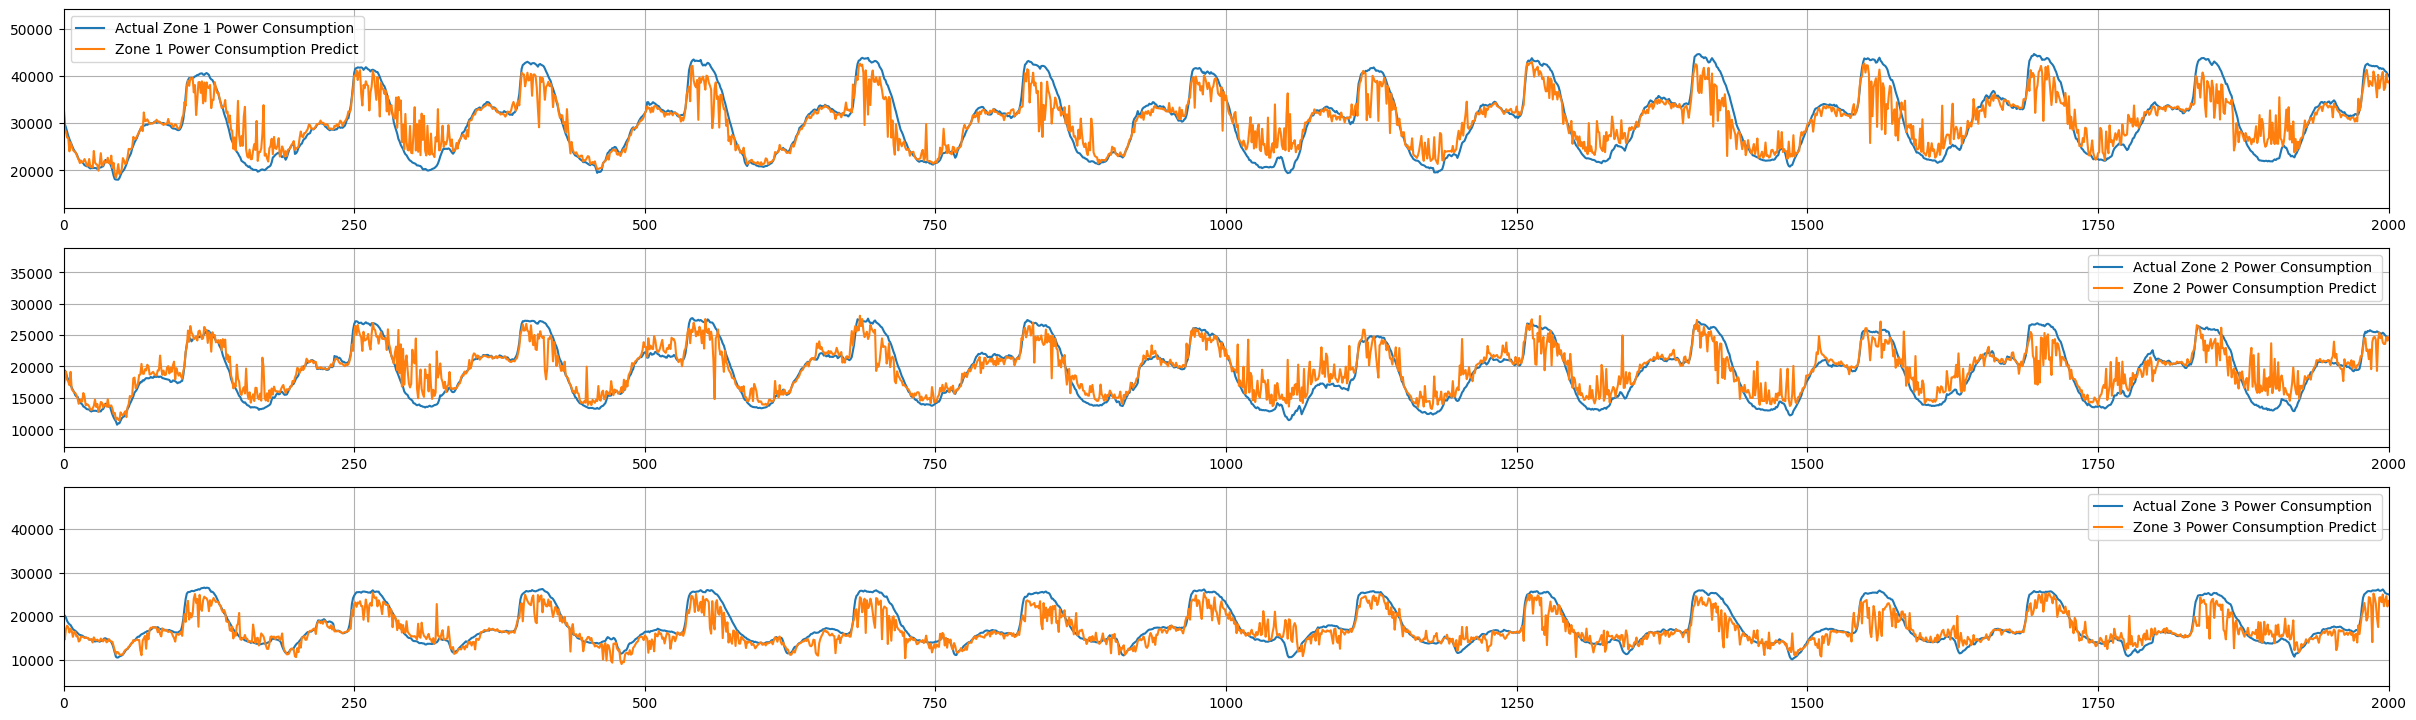

In [31]:
# Graph Predict vs Real Power Consumption [ Model 1 ]
fig = plt.figure(figsize=(30,15))

fig.add_subplot(511)
plt.plot(df_model_1.index, df_model_1['Zone 1 Power Consumption'], label='Actual Zone 1 Power Consumption')
plt.plot(df_model_1.index ,df_model_1['zone1_pred_model_1'], label='Zone 1 Power Consumption Predict')
plt.xlim(0, 2000)
plt.legend()
plt.grid()

fig.add_subplot(512)
plt.plot(df_model_1.index, df_model_1['Zone 2  Power Consumption'], label='Actual Zone 2 Power Consumption')
plt.plot(df_model_1.index ,df_model_1['zone2_pred_model_1'], label='Zone 2 Power Consumption Predict')
plt.xlim(0, 2000)
plt.legend()
plt.grid()

fig.add_subplot(513)
plt.plot(df_model_1.index, df_model_1['Zone 3  Power Consumption'], label='Actual Zone 3 Power Consumption')
plt.plot(df_model_1.index ,df_model_1['zone3_pred_model_1'], label='Zone 3 Power Consumption Predict')
plt.xlim(0, 2000)
plt.legend()
plt.grid()

# Model 2 : Wether Data + Time feature

In [37]:
df_model_2 = df
df_model_2["hour"] = df_model_2["DateTime"].apply(lambda x: x.strftime("%H"))
df_model_2["day_of_week"] = df_model_2["DateTime"].apply(lambda x: x.strftime("%A"))
df_model_2['day_of_week'] = df_model_2['day_of_week'].replace({'Sunday': 0, 'Monday': 1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})
df_model_2['hour'] = df_model_2['hour'].astype(int)
df_model_2 = df_model_2.set_index('DateTime')

In [38]:
# Define X and y
X1_model_2 = df_model_2.drop(['Zone 1 Power Consumption',
       'Zone 2  Power Consumption',
       'Zone 3  Power Consumption'], axis=1)
y1_model_2 = df_model_2['Zone 1 Power Consumption']

X2_model_2 = df_model_2.drop(['Zone 1 Power Consumption',
       'Zone 2  Power Consumption',
       'Zone 3  Power Consumption'], axis=1)
y2_model_2 = df_model_2['Zone 2  Power Consumption']

X3_model_2 = df_model_2.drop(['Zone 1 Power Consumption',
       'Zone 2  Power Consumption',
       'Zone 3  Power Consumption'], axis=1)
y3_model_2 = df_model_2['Zone 3  Power Consumption']

In [39]:
# Split arrays into random train and test subsets (70:30)
X1_train_model_2, X1_test_model_2, y1_train_model_2, y1_test_model_2 = train_test_split(X1_model_2, y1_model_2, test_size=0.30)
X2_train_model_2, X2_test_model_2, y2_train_model_2, y2_test_model_2 = train_test_split(X2_model_2, y2_model_2, test_size=0.30)
X3_train_model_2, X3_test_model_2, y3_train_model_2, y3_test_model_2 = train_test_split(X3_model_2, y3_model_2, test_size=0.30)

regr1_model_2 = RandomForestRegressor(n_estimators=100, bootstrap=True)
regr2_model_2 = RandomForestRegressor(n_estimators=100, bootstrap=True)
regr3_model_2 = RandomForestRegressor(n_estimators=100, bootstrap=True)

# Train (fit) rfc (X_train,y_train)
regr1_model_2.fit(X1_train_model_2, y1_train_model_2)
regr2_model_2.fit(X2_train_model_2, y2_train_model_2)
regr3_model_2.fit(X3_train_model_2, y3_train_model_2)

# Predict X for predict graph
regr1_pred_model_2 = regr1_model_2.predict(X1_model_2)
regr2_pred_model_2 = regr2_model_2.predict(X2_model_2)
regr3_pred_model_2 = regr3_model_2.predict(X3_model_2)

# Predict X_test for evaluate model
regr1_pred_test_model_2 = regr1_model_2.predict(X1_test_model_2)
regr2_pred_test_model_2 = regr2_model_2.predict(X2_test_model_2)
regr3_pred_test_model_2 = regr3_model_2.predict(X3_test_model_2)

df_model_2 = df_model_2.reset_index('DateTime')
df_model_2['zone1_pred_model_2'] = pd.DataFrame(regr1_pred_model_2, columns=['zone1_pred_model_2'])
df_model_2['zone2_pred_model_2'] = pd.DataFrame(regr2_pred_model_2, columns=['zone2_pred_model_2'])
df_model_2['zone3_pred_model_2'] = pd.DataFrame(regr3_pred_model_2, columns=['zone3_pred_model_2'])

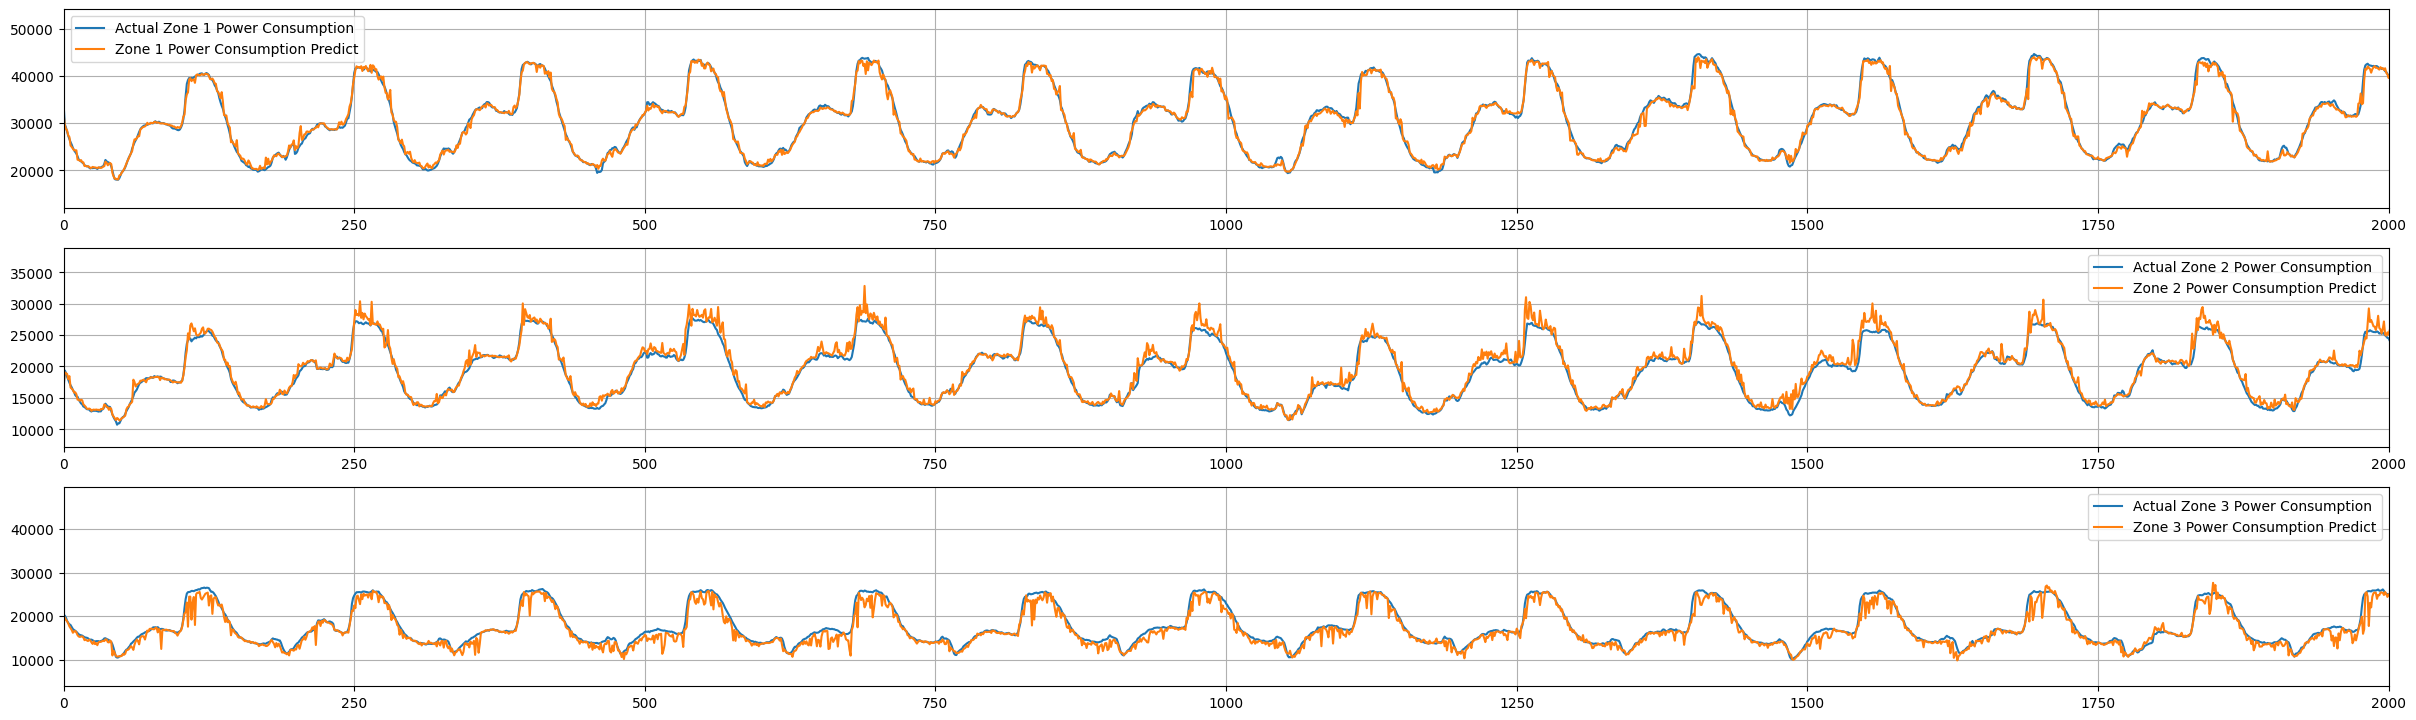

In [40]:
# Graph Predict vs Real Power Consumption [ Model 2 ]
fig = plt.figure(figsize=(30,15))
fig.add_subplot(511)
plt.plot(df_model_2.index, df_model_2['Zone 1 Power Consumption'], label='Actual Zone 1 Power Consumption')
plt.plot(df_model_2.index ,df_model_2['zone1_pred_model_2'], label='Zone 1 Power Consumption Predict')
plt.xlim(0, 2000)
plt.legend()
plt.grid()
fig.add_subplot(512)
plt.plot(df_model_2.index, df_model_2['Zone 2  Power Consumption'], label='Actual Zone 2 Power Consumption')
plt.plot(df_model_2.index ,df_model_2['zone2_pred_model_2'], label='Zone 2 Power Consumption Predict')
plt.xlim(0, 2000)
plt.legend()
plt.grid()
fig.add_subplot(513)
plt.plot(df_model_2.index, df_model_2['Zone 3  Power Consumption'], label='Actual Zone 3 Power Consumption')
plt.plot(df_model_2.index ,df_model_2['zone3_pred_model_2'], label='Zone 3 Power Consumption Predict')
plt.xlim(0, 2000)
plt.legend()
plt.grid()

In [41]:
print('MAE1:', metrics.mean_absolute_error(y1_test_model_2, regr1_pred_test_model_2))
print('MSE1:', metrics.mean_squared_error(y1_test_model_2, regr2_pred_test_model_2))
print('RMSE1:', np.sqrt(metrics.mean_squared_error(y1_test_model_2, regr1_pred_test_model_2)))
print('r2_1:', r2_score(y1_test_model_2, regr1_pred_test_model_2))

MAE1: 1010.2625494084772
MSE1: 201466449.9621263
RMSE1: 1505.5022796445573
r2_1: 0.9556859952284049


In [42]:
print('MAE2:', metrics.mean_absolute_error(y2_test_model_2, regr2_pred_test_model_2))
print('MSE2:', metrics.mean_squared_error(y2_test_model_2, regr2_pred_test_model_2))
print('RMSE2:', np.sqrt(metrics.mean_squared_error(y2_test_model_2, regr2_pred_test_model_2)))
print('r2_2:', r2_score(y2_test_model_2, regr2_pred_test_model_2))

MAE2: 953.0896042564558
MSE2: 1966725.4056015492
RMSE2: 1402.3998736457263
r2_2: 0.9277192986106638


In [43]:
print('MAE3:', metrics.mean_absolute_error(y3_test_model_2, regr3_pred_test_model_2))
print('MSE3:', metrics.mean_squared_error(y3_test_model_2, regr3_pred_test_model_2))
print('RMSE3:', np.sqrt(metrics.mean_squared_error(y3_test_model_2, regr3_pred_test_model_2)))
print('r2_3:', r2_score(y3_test_model_2, regr3_pred_test_model_2))

MAE3: 1221.5533025679508
MSE3: 3335955.1400430496
RMSE3: 1826.4597285576951
r2_3: 0.9235993251037735


# Model 3 : Wether Data + Time feature with PCA

In [44]:
df_model_3 = df.set_index('DateTime')
df_model_x_pca = df.set_index('DateTime')
X = df_model_x_pca.drop(['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption'], axis = 1)
sc = StandardScaler()
X_sc = sc.fit_transform(X)
pca = PCA(0.89)
pca.fit(X_sc)
pca.n_components_
pca = PCA(n_components = 5)
pca.fit(X_sc)

PCA(n_components=5)

In [45]:
# Define X and y
X1_model_3 = df_model_3.drop(['Zone 1 Power Consumption',
       'Zone 2  Power Consumption',
       'Zone 3  Power Consumption'], axis=1)
y1_model_3 = df_model_3['Zone 1 Power Consumption']

X2_model_3 = df_model_3.drop(['Zone 1 Power Consumption',
       'Zone 2  Power Consumption',
       'Zone 3  Power Consumption'], axis=1)
y2_model_3 = df_model_3['Zone 2  Power Consumption']

X3_model_3 = df_model_3.drop(['Zone 1 Power Consumption',
       'Zone 2  Power Consumption',
       'Zone 3  Power Consumption'], axis=1)
y3_model_3 = df_model_3['Zone 3  Power Consumption']

In [46]:
# Split arrays into random train and test subsets (70:30)

X1_train_model_3, X1_test_model_3, y1_train_model_3, y1_test_model_3 = train_test_split(X1_model_3, y1_model_3, test_size=0.30)
X2_train_model_3, X2_test_model_3, y2_train_model_3, y2_test_model_3 = train_test_split(X2_model_3, y2_model_3, test_size=0.30)
X3_train_model_3, X3_test_model_3, y3_train_model_3, y3_test_model_3 = train_test_split(X3_model_3, y3_model_3, test_size=0.30)

X1_sc_model_3 = sc.transform(X1_model_3)
X1_pca_model_3 = pca.transform(X1_sc_model_3)
X2_sc_model_3 = sc.transform(X2_model_3)
X2_pca_model_3 = pca.transform(X2_sc_model_3)
X3_sc_model_3 = sc.transform(X3_model_3)
X3_pca_model_3 = pca.transform(X3_sc_model_3)

X1_train_sc_model_3 = sc.transform(X1_train_model_3)
X1_train_pca_model_3 = pca.transform(X1_train_sc_model_3)
X1_test_sc_model_3 = sc.transform(X1_test_model_3)
X1_test_pca_model_3 = pca.transform(X1_test_sc_model_3)

X2_train_sc_model_3 = sc.transform(X2_train_model_3)
X2_train_pca_model_3 = pca.transform(X2_train_sc_model_3)
X2_test_sc_model_3 = sc.transform(X2_test_model_3)
X2_test_pca_model_3 = pca.transform(X2_test_sc_model_3)

X3_train_sc_model_3 = sc.transform(X3_train_model_3)
X3_train_pca_model_3 = pca.transform(X3_train_sc_model_3)
X3_test_sc_model_3 = sc.transform(X3_test_model_3)
X3_test_pca_model_3 = pca.transform(X3_test_sc_model_3)

regr1_model_3 = RandomForestRegressor(n_estimators=100, bootstrap=True)
regr2_model_3 = RandomForestRegressor(n_estimators=100, bootstrap=True)
regr3_model_3 = RandomForestRegressor(n_estimators=100, bootstrap=True)

In [47]:
# Train (fit) rfc (X_train,y_train)
regr1_model_3.fit(X1_train_pca_model_3, y1_train_model_3)
regr2_model_3.fit(X2_train_pca_model_3, y2_train_model_3)
regr3_model_3.fit(X3_train_pca_model_3, y3_train_model_3)

# Predict X for Graph
regr1_pred_model_3 = regr1_model_3.predict(X1_pca_model_3)
regr2_pred_model_3 = regr2_model_3.predict(X2_pca_model_3)
regr3_pred_model_3 = regr3_model_3.predict(X3_pca_model_3)

# Predict X_test for evaluate model
regr1_pred_test_model_3 = regr1_model_3.predict(X1_test_pca_model_3)
regr2_pred_test_model_3 = regr2_model_3.predict(X2_test_pca_model_3)
regr3_pred_test_model_3 = regr3_model_3.predict(X3_test_pca_model_3)

df_model_3 = df_model_3.reset_index()
df_model_3['zone1_pred_model_3'] = pd.DataFrame(regr1_pred_model_3, columns=['zone1_pred_model_3'])
df_model_3['zone2_pred_model_3'] = pd.DataFrame(regr2_pred_model_3, columns=['zone2_pred_model_3'])
df_model_3['zone3_pred_model_3'] = pd.DataFrame(regr3_pred_model_3, columns=['zone3_pred_model_3'])

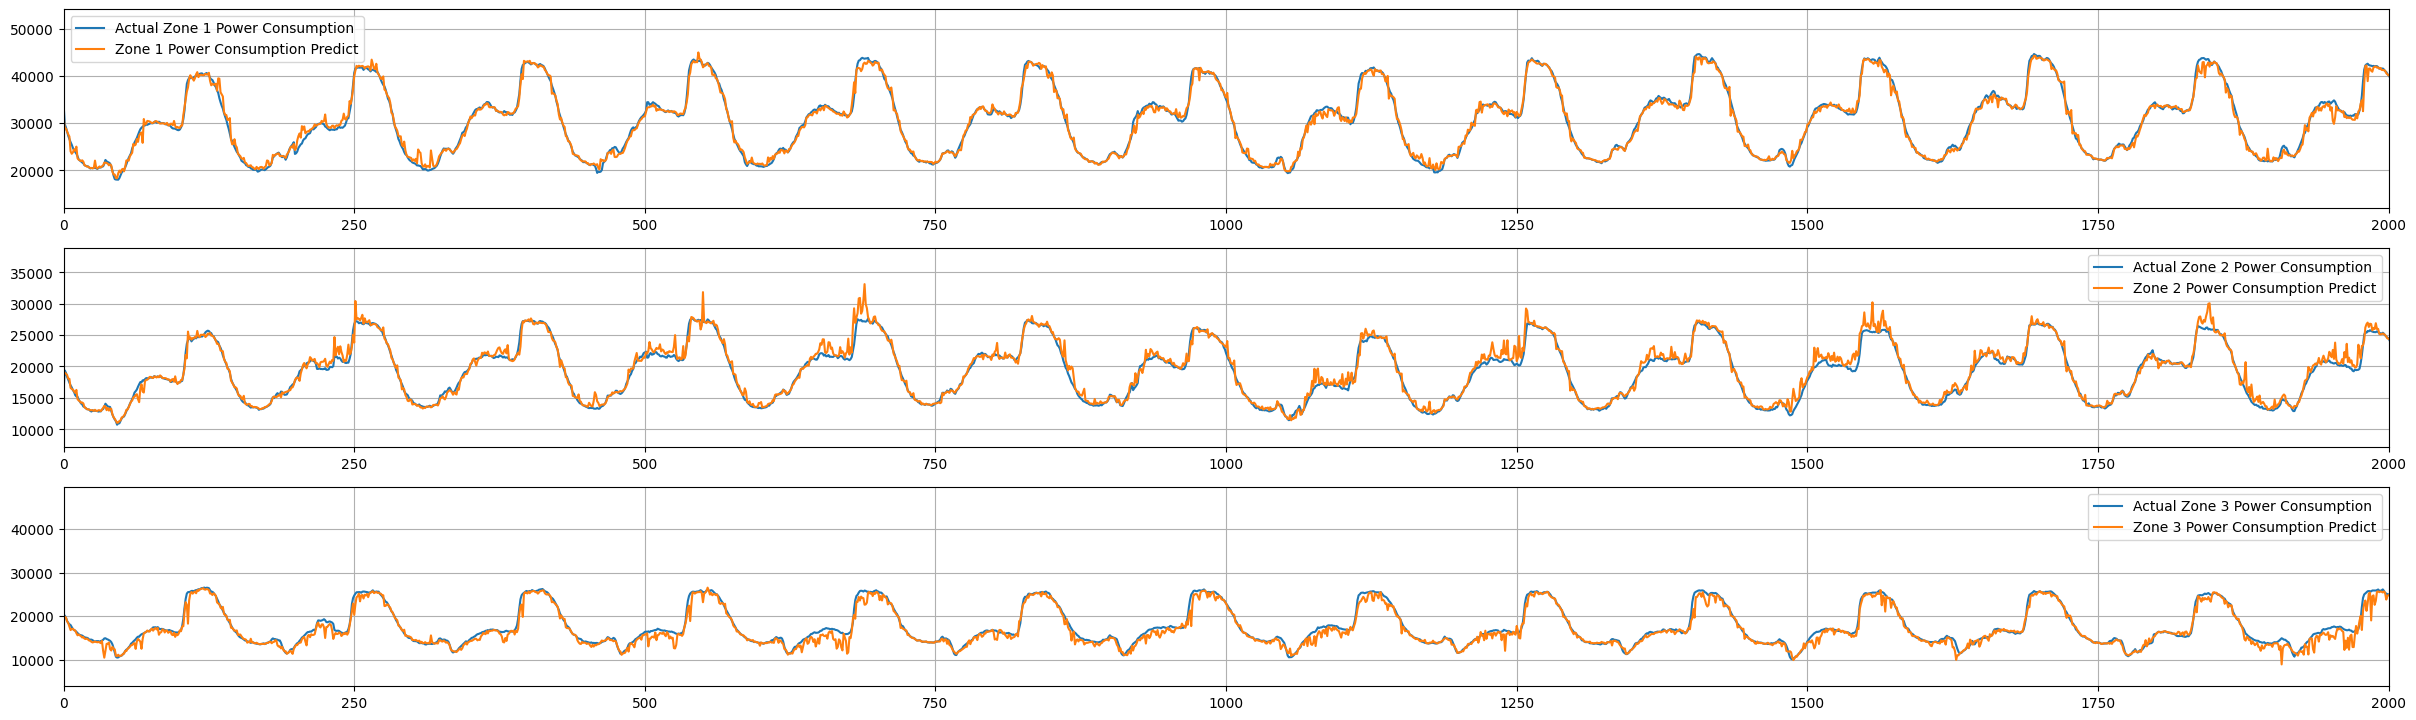

In [48]:
# Graph Predict vs Real Power Consumption [ Model 3 ]
fig = plt.figure(figsize=(30,15))
fig.add_subplot(511)
plt.plot(df_model_3.index, df_model_3['Zone 1 Power Consumption'], label='Actual Zone 1 Power Consumption')
plt.plot(df_model_3.index ,df_model_3['zone1_pred_model_3'], label='Zone 1 Power Consumption Predict')
plt.xlim(0, 2000)
plt.legend()
plt.grid()
fig.add_subplot(512)
plt.plot(df_model_3.index, df_model_3['Zone 2  Power Consumption'], label='Actual Zone 2 Power Consumption')
plt.plot(df_model_3.index ,df_model_3['zone2_pred_model_3'], label='Zone 2 Power Consumption Predict')
plt.xlim(0, 2000)
plt.legend()
plt.grid()
fig.add_subplot(513)
plt.plot(df_model_3.index, df_model_3['Zone 3  Power Consumption'], label='Actual Zone 3 Power Consumption')
plt.plot(df_model_3.index ,df_model_3['zone3_pred_model_3'], label='Zone 3 Power Consumption Predict')
plt.xlim(0, 2000)
plt.legend()
plt.grid()

In [49]:
print('MAE1:', metrics.mean_absolute_error(y1_test_model_3, regr1_pred_test_model_3))
print('MSE1:', metrics.mean_squared_error(y1_test_model_3, regr1_pred_test_model_3))
print('RMSE1:', np.sqrt(metrics.mean_squared_error(y1_test_model_3, regr1_pred_test_model_3)))
print('r2_1:', r2_score(y1_test_model_3, regr1_pred_test_model_3))

MAE1: 1169.5837238854306
MSE1: 3029999.9312133314
RMSE1: 1740.6894987944665
r2_1: 0.940003482227636


In [50]:
print('MAE2:', metrics.mean_absolute_error(y2_test_model_3, regr2_pred_test_model_3))
print('MSE2:', metrics.mean_squared_error(y2_test_model_3, regr2_pred_test_model_3))
print('RMSE2:', np.sqrt(metrics.mean_squared_error(y2_test_model_3, regr2_pred_test_model_3)))
print('r2_2:', r2_score(y2_test_model_3, regr2_pred_test_model_3))

MAE2: 1073.2925873040306
MSE2: 2511260.5710640433
RMSE2: 1584.6957345383507
r2_2: 0.9063088945318617


In [51]:
print('MAE3:', metrics.mean_absolute_error(y3_test_model_3, regr3_pred_test_model_3))
print('MSE3:', metrics.mean_squared_error(y3_test_model_3, regr3_pred_test_model_3))
print('RMSE3:', np.sqrt(metrics.mean_squared_error(y3_test_model_3, regr3_pred_test_model_3)))
print('r2_3:', r2_score(y3_test_model_3, regr3_pred_test_model_3))

MAE3: 1385.6533432351675
MSE3: 4560775.930853774
RMSE3: 2135.5973241352813
r2_3: 0.8959186819942404
